In [1]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_339524e45d8c4ca5b34d613d0c24c364 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='****',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_339524e45d8c4ca5b34d613d0c24c364.get_object(Bucket='sddatascienceandmachinelearning-donotdelete-pr-6sairimnuiulus',Key='NYC_311_Dataset.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df1 = pd.read_csv(body)

In [2]:

# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_1 = {
    'IAM_SERVICE_ID': '****',
    'IBM_API_KEY_ID': '****',
    'ENDPOINT': 'https://s3.eu-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.bluemix.net/oidc/token',
    'BUCKET': 'sddatascienceandmachinelearning-donotdelete-pr-6sairimnuiulus',
    'FILE': 'NYC_311_Dataset.csv'
}


In [3]:
body = client_339524e45d8c4ca5b34d613d0c24c364.get_object(Bucket='sddatascienceandmachinelearning-donotdelete-pr-6sairimnuiulus',Key='BX_18v1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df2 = pd.read_csv(body)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (19,20,22,23,64,65,80) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:

# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_2 = {
    'IAM_SERVICE_ID': '****',
    'IBM_API_KEY_ID': '****',
    'ENDPOINT': 'https://s3.eu-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.bluemix.net/oidc/token',
    'BUCKET': 'sddatascienceandmachinelearning-donotdelete-pr-6sairimnuiulus',
    'FILE': 'BX_18v1.csv'
}


In [5]:
!pip install missingno

Requirement not upgraded as not directly required: missingno in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages
Requirement not upgraded as not directly required: seaborn in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from missingno)
Requirement not upgraded as not directly required: scipy in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from missingno)
Requirement not upgraded as not directly required: matplotlib in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from missingno)
Requirement not upgraded as not directly required: numpy in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from missingno)
Requirement not upgraded as not directly required: pandas in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from seaborn->missingno)
Requirement not upgraded as not directly required: six>=1.10 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from matplotlib->missingno)
Requirement not upgraded as not directly r

In [6]:
!pip install TextBlob

Requirement not upgraded as not directly required: TextBlob in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages
Requirement not upgraded as not directly required: nltk>=3.1 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from TextBlob)
Requirement not upgraded as not directly required: six in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from nltk>=3.1->TextBlob)


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats.stats import pearsonr
from sklearn.ensemble import ExtraTreesClassifier
import warnings
warnings.warn("ignore")

%matplotlib inline

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:9: UserWarning: ignore


This notebook answers the Question 3 - Does the Complaint Type, that you have identified in response to Question 1, have an obvious relationship with any particular characteristic or characteristics of the Houses?

## Droping unnecessary features and cleaning dataset 2

In [8]:
df2 = df2[['Address','BldgArea','BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR', 'Lot', 'LotArea', 
              'LotDepth', 'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea', 
              'YearBuilt', 'YearAlter1', 'ZipCode', 'YCoord', 'XCoord']]

In [9]:
# What are number of rows and columns
df2.shape

(89854, 20)

In [10]:
# Are there any suspicious variables?
df2.columns.values

array(['Address', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR',
       'FacilFAR', 'Lot', 'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors',
       'OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea', 'YearBuilt',
       'YearAlter1', 'ZipCode', 'YCoord', 'XCoord'], dtype=object)

In [11]:
# Display the variable formats
df2.dtypes

Address        object
BldgArea        int64
BldgDepth     float64
BuiltFAR      float64
CommFAR       float64
FacilFAR      float64
Lot             int64
LotArea         int64
LotDepth      float64
NumBldgs        int64
NumFloors     float64
OfficeArea      int64
ResArea         int64
ResidFAR      float64
RetailArea      int64
YearBuilt       int64
YearAlter1      int64
ZipCode       float64
YCoord        float64
XCoord        float64
dtype: object

In [12]:
# Print the observations
df2.head()

,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord
0,122 BRUCKNER BOULEVARD,0,0.0,0.00,5.0,6.5,1,15000,200.0,1,0.0,0,0,6.02,0,0,0,10454.0,232162.0,1005957.0
1,126 BRUCKNER BOULEVARD,752,16.0,0.05,5.0,6.5,4,13770,100.0,2,1.0,272,0,6.02,0,1931,1994,10454.0,232156.0,1006076.0
2,138 BRUCKNER BOULEVARD,39375,200.0,1.13,5.0,6.5,10,35000,200.0,1,2.0,0,0,6.02,0,1931,0,10454.0,232036.0,1006187.0
3,144 BRUCKNER BOULEVARD,12500,85.0,5.00,5.0,6.5,17,2500,100.0,1,5.0,0,12500,6.02,0,1931,2001,10454.0,232033.0,1006299.0
4,148 BRUCKNER BOULEVARD,8595,70.0,4.58,5.0,6.5,18,1875,75.0,1,5.0,0,6876,6.02,1719,1920,2009,10454.0,232040.0,1006363.0


In [13]:
# Are there any variables with missing values?
df2.isnull().sum()

Address         69
BldgArea         0
BldgDepth        0
BuiltFAR         0
CommFAR          0
FacilFAR         0
Lot              0
LotArea          0
LotDepth         0
NumBldgs         0
NumFloors        0
OfficeArea       0
ResArea          0
ResidFAR         0
RetailArea       0
YearBuilt        0
YearAlter1       0
ZipCode        329
YCoord        3259
XCoord        3259
dtype: int64

In [14]:
# Drop all missing values from BK dataset
pd.options.mode.chained_assignment = None
df2.dropna(axis=0, inplace=True)

In [15]:
df2.isnull().sum()

Address       0
BldgArea      0
BldgDepth     0
BuiltFAR      0
CommFAR       0
FacilFAR      0
Lot           0
LotArea       0
LotDepth      0
NumBldgs      0
NumFloors     0
OfficeArea    0
ResArea       0
ResidFAR      0
RetailArea    0
YearBuilt     0
YearAlter1    0
ZipCode       0
YCoord        0
XCoord        0
dtype: int64

In [16]:
df2.shape

(86591, 20)

In [17]:
# Change column Zipcode to incident_zip
df2.columns = ['Address','BldgArea','BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR', 'Lot', 'LotArea', 
              'LotDepth', 'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea', 
              'YearBuilt', 'YearAlter1', 'incident_zip', 'YCoord', 'XCoord']

In [18]:
df2.columns.values

array(['Address', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR',
       'FacilFAR', 'Lot', 'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors',
       'OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea', 'YearBuilt',
       'YearAlter1', 'incident_zip', 'YCoord', 'XCoord'], dtype=object)

In [19]:
df2['incident_zip'].value_counts(sort=False)

10451.0     1128
10452.0     1478
10453.0     2041
10454.0     1649
10455.0     1754
10456.0     2802
10457.0     2956
10458.0     2721
10459.0     2558
10460.0     2805
10461.0     7324
10462.0     4513
10463.0     2140
10464.0     1403
10465.0     7853
10466.0     8965
10467.0     4577
10468.0     1580
10469.0    11078
10470.0     2269
10471.0     2135
10472.0     4266
10473.0     4719
10474.0     1153
10475.0      723
11370.0        1
Name: incident_zip, dtype: int64

Using domain knowledge on the dataset, I decided to drop the following columns: BldgArea, BldgDepth, BuiltFAR, CommFAR, FacilFAR, Lot, LotArea, LotDepth, OfficeArea, ResArea, ResidFAR, RetailArea, YCoord and XCoord.

Features which represents area sizes have a lot of zeros which will impact model training later will be dropped.

In [20]:
df2.drop(['BldgArea','BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR', 'Lot', 'LotArea', 
              'LotDepth','OfficeArea', 'ResArea', 'ResidFAR', 'RetailArea', 'YCoord', 'XCoord'], axis=1, inplace=True)

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86591 entries, 0 to 89845
Data columns (total 6 columns):
Address         86591 non-null object
NumBldgs        86591 non-null int64
NumFloors       86591 non-null float64
YearBuilt       86591 non-null int64
YearAlter1      86591 non-null int64
incident_zip    86591 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 4.6+ MB


In [22]:
# Eliminate zero number of floors as they are N/A info.
df2['NumFloors'].value_counts(sort=False)

0.00      3613
2.00     42135
4.00      1700
8.00       154
0.50         1
1.33         1
25.00        5
18.00       10
44.00        1
33.00        2
10.00       43
3.50        61
22.00        7
4.50         1
17.00        5
3.00     15186
20.00       24
1.50      1528
14.00       42
3.75        18
2.50      5075
2.67        20
42.00        1
30.00        5
23.00        1
13.00       38
1.00      8823
12.00       48
16.00       23
9.00        77
5.50         1
5.00      3236
2.25         9
28.00        2
11.00       37
19.00       12
6.00      2171
1.75       715
24.00        1
1.67       341
7.00       231
2.75      1163
1.25         1
21.00       12
15.00       11
Name: NumFloors, dtype: int64

In [23]:
df2[df2.NumFloors == 0].count()

Address         3613
NumBldgs        3613
NumFloors       3613
YearBuilt       3613
YearAlter1      3613
incident_zip    3613
dtype: int64

In [24]:
df2 = df2[df2.NumFloors != 0]

In [25]:
df2[df2.NumFloors == 0].count()

Address         0
NumBldgs        0
NumFloors       0
YearBuilt       0
YearAlter1      0
incident_zip    0
dtype: int64

In [26]:
# Recheck again
df2['NumFloors'].value_counts(sort=False)

1.00      8823
2.00     42135
16.00       23
8.00       154
0.50         1
1.33         1
25.00        5
18.00       10
44.00        1
33.00        2
10.00       43
3.50        61
22.00        7
4.50         1
17.00        5
3.00     15186
20.00       24
1.50      1528
14.00       42
3.75        18
2.50      5075
2.67        20
42.00        1
30.00        5
23.00        1
13.00       38
4.00      1700
12.00       48
9.00        77
5.50         1
5.00      3236
2.25         9
28.00        2
11.00       37
19.00       12
6.00      2171
1.75       715
24.00        1
1.67       341
7.00       231
2.75      1163
1.25         1
21.00       12
15.00       11
Name: NumFloors, dtype: int64

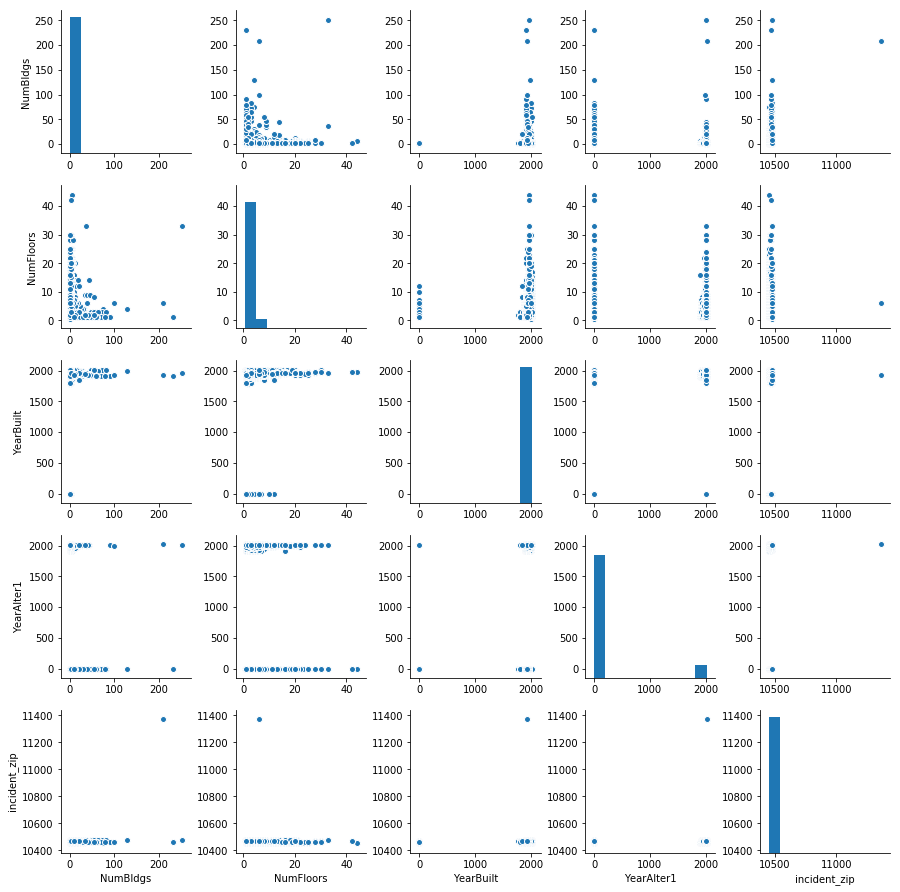

In [27]:
sns.pairplot(df2)

In [28]:
df2.head()

,Address,NumBldgs,NumFloors,YearBuilt,YearAlter1,incident_zip
1,126 BRUCKNER BOULEVARD,2,1.0,1931,1994,10454.0
2,138 BRUCKNER BOULEVARD,1,2.0,1931,0,10454.0
3,144 BRUCKNER BOULEVARD,1,5.0,1931,2001,10454.0
4,148 BRUCKNER BOULEVARD,1,5.0,1920,2009,10454.0
6,519 EAST 132 STREET,2,1.0,1931,0,10454.0


In [29]:
df2.shape

(82978, 6)

## Droping unnecessary features and cleaning dataset 1 as for questions 1 and 2

In [30]:
df1.drop(columns = ['address_type','closed_date','created_date','latitude','location_type','longitude','resolution_description','status','street_name','unique_key'], inplace=True)
df1['complaint_type'] = np.where(df1['complaint_type']=='HEATING','HEAT/HOT WATER',df1['complaint_type'])
df1.dropna(axis=0, inplace=True)
df1[(df1['complaint_type'] == 'HEAT/HOT WATER') & (df1['borough'] == 'BROOKLYN')]
df1[(df1['complaint_type'] == 'HEAT/HOT WATER') & (df1['borough'] == 'BRONX')]
df1[(df1['complaint_type'] == 'HEAT/HOT WATER') & (df1['borough'] == 'MANHATTAN')]
df1[(df1['complaint_type'] == 'HEAT/HOT WATER') & (df1['borough'] == 'STATEN ISLAND')]
df1[(df1['complaint_type'] == 'HEAT/HOT WATER') & (df1['borough'] == 'QUEENS')]
stats = df1[df1['complaint_type'] == 'HEAT/HOT WATER'].groupby('borough')
stats = df1[df1['complaint_type'] == 'HEAT/HOT WATER'].groupby('incident_zip')
stats = df1[df1['complaint_type'] == 'HEAT/HOT WATER'].groupby(['borough','incident_zip','incident_address'])
df1[df1.borough == "Unspecified"]
df1 = df1[~df1.borough.str.contains("Unspecified")]
df1.head()

,borough,city,complaint_type,incident_address,incident_zip
0,BROOKLYN,BROOKLYN,DOOR/WINDOW,397 1 STREET,11215.0
1,MANHATTAN,NEW YORK,DOOR/WINDOW,3851 BROADWAY,10032.0
2,MANHATTAN,NEW YORK,DOOR/WINDOW,3851 BROADWAY,10032.0
3,BROOKLYN,BROOKLYN,DOOR/WINDOW,1555 NOSTRAND AVENUE,11226.0
4,BRONX,BRONX,DOOR/WINDOW,1808 MULFORD AVENUE,10461.0


In [31]:
df1[df1.borough == "BROOKLYN"].count()

borough             1590804
city                1590804
complaint_type      1590804
incident_address    1590804
incident_zip        1590804
dtype: int64

In [32]:
df1[df1.borough == "MANHATTAN"].count()

borough             951843
city                951843
complaint_type      951843
incident_address    951843
incident_zip        951843
dtype: int64

In [33]:
df1[df1.borough == "QUEENS"].count()

borough             582722
city                582722
complaint_type      582722
incident_address    582722
incident_zip        582722
dtype: int64

In [34]:
df1[df1.borough == "STATEN ISLAND"].count()

borough             79618
city                79618
complaint_type      79618
incident_address    79618
incident_zip        79618
dtype: int64

In [35]:
df1[df1.borough == "BRONX"].count()

borough             1457952
city                1457952
complaint_type      1457952
incident_address    1457952
incident_zip        1457952
dtype: int64

## Drop except BRONX for borough feature

In [36]:
df1 = df1[~df1.borough.str.contains("BROOKLYN")] ## Drop BROOKLYN
df1 = df1[~df1.borough.str.contains("MANHATTAN")] ## Drop MANHATTAN
df1 = df1[~df1.borough.str.contains("STATEN ISLAND")] ## Drop STATEN ISLAND
df1 = df1[~df1.borough.str.contains("QUEENS")] ## Drop QUEENS
df1.shape

(1457952, 5)

In [37]:
df1.head()

,borough,city,complaint_type,incident_address,incident_zip
4,BRONX,BRONX,DOOR/WINDOW,1808 MULFORD AVENUE,10461.0
6,BRONX,BRONX,DOOR/WINDOW,2414 EAST TREMONT AVENUE,10461.0
12,BRONX,BRONX,SAFETY,488 EAST 163 STREET,10451.0
13,BRONX,BRONX,HEAT/HOT WATER,1505 TOWNSEND AVENUE,10452.0
14,BRONX,BRONX,HEAT/HOT WATER,1390 PROSPECT AVENUE,10459.0


## Drop except HEAT/HOT WATER for complaint_type feature

In [38]:
df1 = df1[df1.complaint_type.str.contains("HEAT/HOT WATER")]

In [39]:
# Are there any suspicious variables?
df1.columns.values

array(['borough', 'city', 'complaint_type', 'incident_address',
       'incident_zip'], dtype=object)

In [40]:
# Display the variable formats
df1.dtypes

borough              object
city                 object
complaint_type       object
incident_address     object
incident_zip        float64
dtype: object

In [41]:
df1['borough'].value_counts(sort=False)

BRONX    532325
Name: borough, dtype: int64

In [42]:
df1['city'].value_counts(sort=False)

BRONX    532325
Name: city, dtype: int64

In [43]:
df1['complaint_type'].value_counts(sort=False)

HEAT/HOT WATER    532325
Name: complaint_type, dtype: int64

In [44]:
df1['incident_address'].value_counts(sort=False)

1637 PARKER STREET             2
664 ST ANNS AVENUE            19
1613 OVERING STREET           11
112 HENWOOD PLACE             15
870 EAST 163 STREET           10
932 EAST 223 STREET            9
1038 EVERGREEN AVENUE          1
984 SHERIDAN AVENUE           39
1180 ANDERSON AVENUE         140
3026 HOLLAND AVENUE           15
530 EAST 188 STREET            3
726A EAST 223 STREET          16
700 BARTHOLDI STREET          12
1811 PHELAN PLACE             30
2307 BEAUMONT AVENUE          23
415 EAST  187 STREET           9
823 EAST 223 STREET            1
633 EAST 235 STREET            1
4790 BARNES AVENUE             2
2710 JEROME AVENUE             1
4646 PARK AVENUE              53
803 ELSMERE PLACE              4
2527 3 AVENUE                  1
1260 STRATFORD AVENUE          4
802 EAST  215 STREET           2
912 EAST  163 STREET           1
1738 ADAMS STREET              1
1411 HOLLYWOOD AVENUE          1
2740 CLAFLIN AVENUE            1
2447 OLINVILLE AVENUE          1
          

In [45]:
df1['incident_zip'].value_counts(sort=False)

10451.0    20774
10452.0    38350
10453.0    44460
10454.0     8410
10455.0    13273
10456.0    34015
10457.0    34468
10458.0    50953
10459.0    17704
10460.0    24808
10461.0    12300
10462.0    31695
10463.0    27676
10464.0      296
10465.0     1961
10466.0    18728
10467.0    50794
10468.0    44827
10469.0     7733
10470.0     6198
10471.0     3135
10472.0    27099
10473.0     7294
10474.0     4663
10475.0      707
10803.0        4
Name: incident_zip, dtype: int64

In [46]:
df1.isnull().sum()

borough             0
city                0
complaint_type      0
incident_address    0
incident_zip        0
dtype: int64

In [47]:
stats = df1[df1['complaint_type'] == 'HEAT/HOT WATER'].groupby('incident_zip')
stats.count()

,borough,city,complaint_type,incident_address
incident_zip,,,,
10451.0,20774,20774,20774,20774
10452.0,38350,38350,38350,38350
10453.0,44460,44460,44460,44460
10454.0,8410,8410,8410,8410
10455.0,13273,13273,13273,13273
10456.0,34015,34015,34015,34015
10457.0,34468,34468,34468,34468
10458.0,50953,50953,50953,50953
10459.0,17704,17704,17704,17704


In [48]:
#Print the observations
df2.head()

,Address,NumBldgs,NumFloors,YearBuilt,YearAlter1,incident_zip
1,126 BRUCKNER BOULEVARD,2,1.0,1931,1994,10454.0
2,138 BRUCKNER BOULEVARD,1,2.0,1931,0,10454.0
3,144 BRUCKNER BOULEVARD,1,5.0,1931,2001,10454.0
4,148 BRUCKNER BOULEVARD,1,5.0,1920,2009,10454.0
6,519 EAST 132 STREET,2,1.0,1931,0,10454.0


In [49]:
df2['Address'].value_counts(sort=False)

1637 PARKER STREET          1
225 BETTS AVENUE            1
3034 WICKHAM AVENUE         1
3453 ELY AVENUE             1
2522 YATES AVENUE           1
1613 OVERING STREET         1
3503 EAST TREMONT AVENUE    1
45 EAST 233 STREET          1
1866 NARRAGANSETT AVENUE    1
3817 LACONIA AVENUE         1
2612 MILES AVENUE           1
708 EAST 135 STREET         1
2732 LATTING STREET         1
870 EAST 163 STREET         1
2451 HOFFMAN STREET         1
2510 BARKER AVENUE          1
682 MINNIEFORD AVENUE       1
554 VINCENT AVENUE          1
166 SCHOFIELD STREET        1
746 LOGAN AVENUE            1
5151 POST ROAD              1
984 SHERIDAN AVENUE         1
1016 EAST 231 STREET        1
1180 ANDERSON AVENUE        1
3026 HOLLAND AVENUE         1
768 TRINITY AVENUE          1
2153 BELMONT AVENUE         1
626 CRESCENT AVENUE         1
312 EAST 240 STREET         1
4072 BAYCHESTER AVENUE      1
                           ..
1362 ROSEDALE AVENUE        1
239 WEST 230 STREET         1
2722 COLDE

In [50]:
df2['NumBldgs'].value_counts(sort=False)

0         60
64         1
1      66301
129        1
2      15266
3        875
4        190
5         72
6         40
70         1
7         25
8         16
72         1
9         14
10        13
74         1
11         9
12         8
13         4
14         7
78         1
15         5
16         4
208        1
17         3
18         3
82         1
19         2
20         3
21         3
22         2
23         2
24         2
26         3
91         1
28         1
29         1
30         2
31         3
33         1
35         3
100        1
37         2
230        1
39         4
40         1
44         1
46         2
47         1
48         2
52         1
54         3
55         1
57         2
58         2
251        1
62         1
Name: NumBldgs, dtype: int64

In [51]:
df2['NumFloors'].value_counts(sort=False)

1.00      8823
2.00     42135
16.00       23
8.00       154
0.50         1
1.33         1
25.00        5
18.00       10
44.00        1
33.00        2
10.00       43
3.50        61
22.00        7
4.50         1
17.00        5
3.00     15186
20.00       24
1.50      1528
14.00       42
3.75        18
2.50      5075
2.67        20
42.00        1
30.00        5
23.00        1
13.00       38
4.00      1700
12.00       48
9.00        77
5.50         1
5.00      3236
2.25         9
28.00        2
11.00       37
19.00       12
6.00      2171
1.75       715
24.00        1
1.67       341
7.00       231
2.75      1163
1.25         1
21.00       12
15.00       11
Name: NumFloors, dtype: int64

In [52]:
df2['YearBuilt'].value_counts(sort=False)

0         28
1920    7538
1984      52
1921     116
1985     198
1922     247
1986     172
1923     289
1987     445
1924     525
1988     396
1925    6328
1989     329
1926     772
1990     362
1927    1085
1991     446
1800      44
1928     984
1992     641
1929     529
1993     519
1930    5832
1994     247
1931    3163
1995     323
1868       1
1932     209
1996     289
1933      95
        ... 
1971      79
1780       1
1908      61
1972      93
1909     132
1973      89
1910    3868
1974     104
1911     181
1975     439
1848       1
1912     175
1976      52
1849       1
1913     217
1977      36
1850       1
1914     104
1978      42
1915    1735
1979      47
1916     146
1980     117
1853       1
1917      89
1981      44
1918      45
1982      51
1919      35
1983      42
Name: YearBuilt, Length: 146, dtype: int64

In [53]:
df2['YearAlter1'].value_counts(sort=False)

0       75087
1920        2
1984       68
1921        2
1985       69
1922        5
1986       75
1923        1
1987       82
1924        1
1988      113
1925        4
1989       99
1926        2
1990      179
1927        1
1991      292
1992      172
1929        2
1993      202
1930        3
1994      294
1931        3
1995      196
1932        1
1996      262
1933        1
1997      202
1998      244
1935        1
        ...  
1966       10
1967       23
1968       13
1905        1
1969       13
1906        1
1970       11
1971        9
1908        1
1972       20
1973       19
1910        1
1974       33
1911        2
1975       27
1912        2
1976       22
1913        3
1977       32
1914        1
1978       32
1915        4
1979       48
1916        2
1980       70
1981       48
1918        2
1982       75
1919        1
1983       71
Name: YearAlter1, Length: 108, dtype: int64

In [54]:
df2['incident_zip'].value_counts(sort=False)

10451.0      990
10452.0     1303
10453.0     1934
10454.0     1505
10455.0     1604
10456.0     2551
10457.0     2670
10458.0     2580
10459.0     2359
10460.0     2601
10461.0     7168
10462.0     4411
10463.0     2041
10464.0     1331
10465.0     7676
10466.0     8810
10467.0     4465
10468.0     1505
10469.0    10928
10470.0     2218
10471.0     2007
10472.0     4202
10473.0     4464
10474.0     1015
10475.0      639
11370.0        1
Name: incident_zip, dtype: int64

In [55]:
df2.isnull().sum()

Address         0
NumBldgs        0
NumFloors       0
YearBuilt       0
YearAlter1      0
incident_zip    0
dtype: int64

In [56]:
stats = df1.groupby(['incident_zip'], as_index=True) 
stats.count()

,borough,city,complaint_type,incident_address
incident_zip,,,,
10451.0,20774,20774,20774,20774
10452.0,38350,38350,38350,38350
10453.0,44460,44460,44460,44460
10454.0,8410,8410,8410,8410
10455.0,13273,13273,13273,13273
10456.0,34015,34015,34015,34015
10457.0,34468,34468,34468,34468
10458.0,50953,50953,50953,50953
10459.0,17704,17704,17704,17704


In [57]:
stats2 = df2.groupby(['incident_zip'], as_index=True) 
stats2.count()

,Address,NumBldgs,NumFloors,YearBuilt,YearAlter1
incident_zip,,,,,
10451.0,990,990,990,990,990
10452.0,1303,1303,1303,1303,1303
10453.0,1934,1934,1934,1934,1934
10454.0,1505,1505,1505,1505,1505
10455.0,1604,1604,1604,1604,1604
10456.0,2551,2551,2551,2551,2551
10457.0,2670,2670,2670,2670,2670
10458.0,2580,2580,2580,2580,2580
10459.0,2359,2359,2359,2359,2359


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


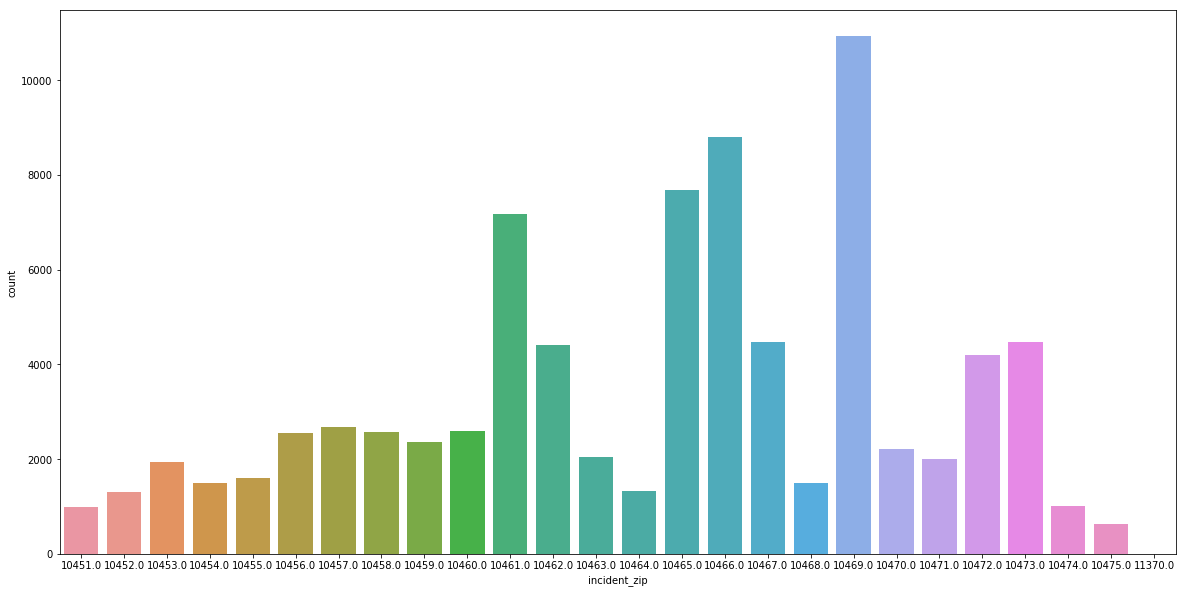

In [58]:
plt.figure(figsize=(20,10))
sns.countplot(x=df2.incident_zip)

In [59]:
df1['incident_zip'].isin(df2['incident_zip']).value_counts()

True     532321
False         4
Name: incident_zip, dtype: int64

In [60]:
df1 = df1[df1.incident_zip.isin(df2['incident_zip'])]

In [61]:
df2['incident_zip'].isin(df1['incident_zip']).value_counts()

True     82977
False        1
Name: incident_zip, dtype: int64

In [62]:
df2 = df2[df2.incident_zip.isin(df1['incident_zip'])]

In [63]:
df1['incident_zip'].isin(df2['incident_zip']).value_counts()

True    532321
Name: incident_zip, dtype: int64

In [64]:
df2['incident_zip'].isin(df1['incident_zip']).value_counts()

True    82977
Name: incident_zip, dtype: int64

In [65]:
df1.head()

,borough,city,complaint_type,incident_address,incident_zip
13,BRONX,BRONX,HEAT/HOT WATER,1505 TOWNSEND AVENUE,10452.0
14,BRONX,BRONX,HEAT/HOT WATER,1390 PROSPECT AVENUE,10459.0
189,BRONX,BRONX,HEAT/HOT WATER,2995 BOTANICAL SQUARE,10458.0
192,BRONX,BRONX,HEAT/HOT WATER,2351 GRAND CONCOURSE,10468.0
205,BRONX,BRONX,HEAT/HOT WATER,750 GRAND CONCOURSE,10451.0


In [66]:
df1 = df1.tail(100000)
df2.drop(['Address','NumBldgs','YearAlter1'], axis=1, inplace=True)

df1 = df1[df1.incident_zip.isin(df2['incident_zip'])]
df2 = df2[df2.incident_zip.isin(df1['incident_zip'])]

In [67]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 4751859 to 5563629
Data columns (total 5 columns):
borough             100000 non-null object
city                100000 non-null object
complaint_type      100000 non-null object
incident_address    100000 non-null object
incident_zip        100000 non-null float64
dtypes: float64(1), object(4)
memory usage: 4.6+ MB


In [68]:
df2.head()

,NumFloors,YearBuilt,incident_zip
1,1.0,1931,10454.0
2,2.0,1931,10454.0
3,5.0,1931,10454.0
4,5.0,1920,10454.0
6,1.0,1931,10454.0


In [69]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82977 entries, 1 to 89845
Data columns (total 3 columns):
NumFloors       82977 non-null float64
YearBuilt       82977 non-null int64
incident_zip    82977 non-null float64
dtypes: float64(2), int64(1)
memory usage: 2.5 MB


In [70]:
df1 = df1.head(40000)

In [71]:
df2 = df2.tail(50000)

In [72]:
df4 = pd.merge(df1,df2, on="incident_zip", how='outer')

In [73]:
df4.drop(['borough','city'], axis=1, inplace=True)
df4.head()

,complaint_type,incident_address,incident_zip,NumFloors,YearBuilt
0,HEAT/HOT WATER,1133 MORRISON AVENUE,10472.0,1.0,1930.0
1,HEAT/HOT WATER,1133 MORRISON AVENUE,10472.0,1.0,1953.0
2,HEAT/HOT WATER,1133 MORRISON AVENUE,10472.0,2.0,1927.0
3,HEAT/HOT WATER,1133 MORRISON AVENUE,10472.0,2.0,1927.0
4,HEAT/HOT WATER,1133 MORRISON AVENUE,10472.0,2.0,1927.0


In [74]:
df4.shape

(53997758, 5)

In [75]:
df4.isnull().sum()

complaint_type          0
incident_address        0
incident_zip            0
NumFloors           17059
YearBuilt           17059
dtype: int64

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]), <a list of 39 Text xticklabel objects>)

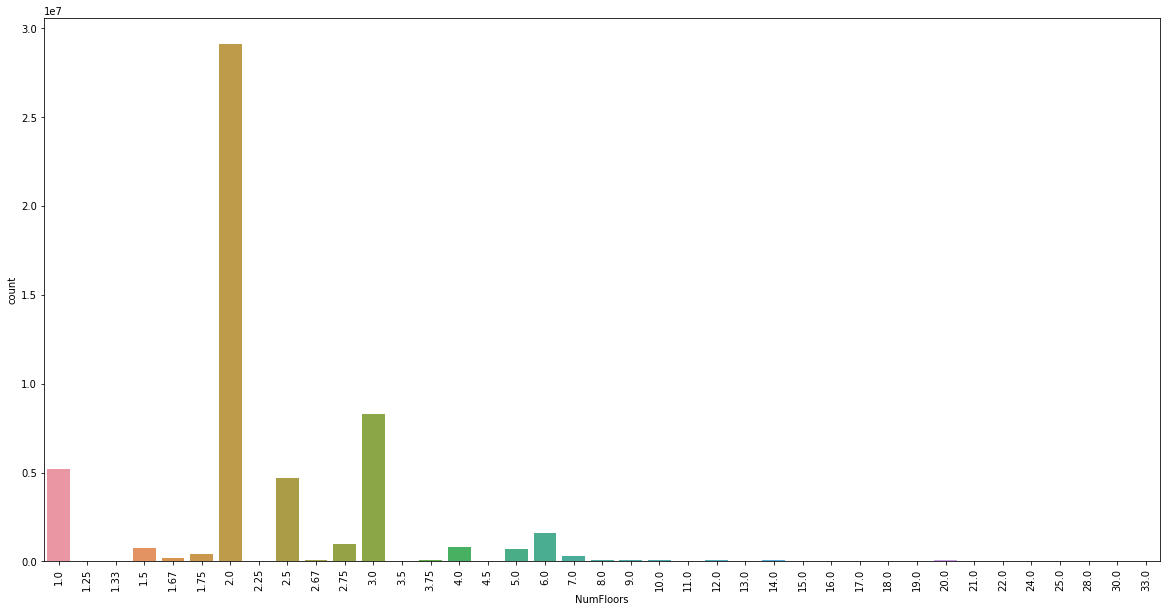

In [76]:
plt.figure(figsize=(20,10))
sns.countplot(x=df4.NumFloors)
plt.xticks(rotation=90)

In [77]:
# Correlation
stats = df4[df4['complaint_type'] == 'HEAT/HOT WATER'].groupby('NumFloors')
stats.count()

,complaint_type,incident_address,incident_zip,YearBuilt
NumFloors,,,,
1.00,5203350,5203350,5203350,5203350
1.25,730,730,730,730
1.33,36,36,36,36
1.50,778862,778862,778862,778862
1.67,176776,176776,176776,176776
1.75,419582,419582,419582,419582
2.00,29133605,29133605,29133605,29133605
2.25,9245,9245,9245,9245
2.50,4689445,4689445,4689445,4689445


# Concluding Remark 1: We can see a very high correlation between the complaint type "HEAT/HOT WATER" and buildings having 2 floors.

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134]), <a list of 135 Text xticklabel objects>)

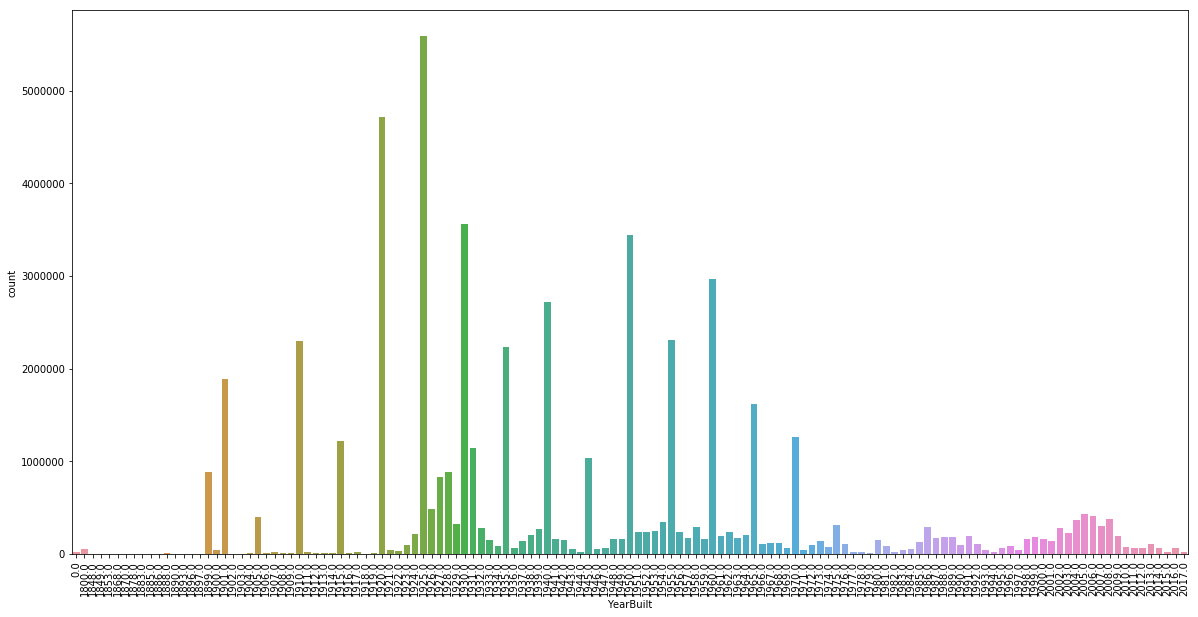

In [78]:
plt.figure(figsize=(20,10))
sns.countplot(x=df4.YearBuilt)
plt.xticks(rotation=90)

# Concluding Remark 2: We can see that most buildings with high "HEAT/HOT WATER" complaint type are built prior to 1970.